In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

geraldton au
zhanatas kz
hobart au
castro cl
barrow us
rikitea pf
butaritari ki
puerto ayora ec
airai pw
bredasdorp za
rikitea pf
punta arenas cl
rikitea pf
vaini to
barrow us
bonavista ca
orlik ru
inhambane mz
pangnirtung ca
vaini to
kodiak us
azrow af
umzimvubu za
taolanaro mg
qaanaaq gl
bandarbeyla so
busselton au
dunedin nz
punta arenas cl
ulaangom mn
tasiilaq gl
jamestown sh
taolanaro mg
butaritari ki
tasiilaq gl
rikitea pf
auchi ng
roald no
vaini to
beberibe br
ilulissat gl
sterling us
saskylakh ru
rawson ar
kavieng pg
saldanha za
rikitea pf
cape town za
port hardy ca
castro cl
namibe ao
matara lk
hithadhoo mv
uyar ru
mehamn no
kalat pk
busselton au
taolanaro mg
tuktoyaktuk ca
hilo us
mataura pf
mataura pf
new norfolk au
cape town za
clyde river ca
avarua ck
camacha pt
bubaque gw
oranjemund na
bereda so
torbay ca
sarankhola bd
puerto ayora ec
rio gallegos ar
punta arenas cl
port alfred za
neuquen ar
mataura pf
albany au
puerto ayora ec
kapaa us
arraial do cabo br
mizan teferi et


severo-kurilsk ru
ambon id
havre-saint-pierre ca
half moon bay us
rikitea pf
busselton au
manokwari id
vao nc
nanortalik gl
kapaa us
leningradskiy ru
mahebourg mu
puerto ayora ec
mugur-aksy ru
bluff nz
kloulklubed pw
isiro cd
tuktoyaktuk ca
ushuaia ar
castro cl
new norfolk au
te anau nz
alim ph
cidreira br
rikitea pf
barrow us
vaitupu wf
nikolskoye ru
rikitea pf
grand river south east mu
albany au
omboue ga
vaini to
rikitea pf
hilo us
kapaa us
ust-karsk ru
busselton au
iqaluit ca
albany au
carnot cf
villarrobledo es
mishelevka ru
punta arenas cl
waddan ly
nikolskoye ru
albany au
kodiak us
cabo san lucas mx
port elizabeth za
attawapiskat ca
faanui pf
atuona pf
san quintin mx
tasiilaq gl
fortuna us
krasnomayskiy ru
yellowknife ca
busselton au
busselton au
ushuaia ar
atzompa mx
ilulissat gl
leningradskiy ru
jamestown sh
alofi nu
atuona pf
jamestown sh
saint george bm
ardesen tr
mataura pf
nome us
ahipara nz
punta arenas cl
castro cl
mataura pf
namibe ao
rikitea pf
punta arenas cl
busselto

san quintin mx
ushuaia ar
ponta do sol cv
cape town za
punta arenas cl
zaraza ve
heinola fi
kapaa us
saint george bm
ushuaia ar
zolotinka ru
kemise et
bajitpur bd
yaan cn
hithadhoo mv
hamilton bm
saint-augustin ca
illoqqortoormiut gl
paredon mx
port alfred za
avarua ck
rio grande br
port moresby pg
cockburn harbour tc
taolanaro mg
aklavik ca
rikitea pf
bambous virieux mu
bredasdorp za
loreto mx
olden no
touros br
illoqqortoormiut gl
hermanus za
leningradskiy ru
east london za
bethel us
marondera zw
iqaluit ca
albany au
roald no
hobart au
okha ru
kapaa us
arraial do cabo br
morro bay us
souillac mu
kerteh my
sinop tr
katsuura jp
jamestown sh
puerto ayora ec
vardo no
pevek ru
mar del plata ar
punta arenas cl
grand river south east mu
nioro ml
hilo us
sao miguel do araguaia br
bethel us
ribeira grande pt
puerto ayora ec
saldanha za
busselton au
hobart au
port elizabeth za
boda cf
new norfolk au
port augusta au
fairbanks us
chicaman gt
tuktoyaktuk ca
moron mn
vaini to
camacha pt
mar del pl

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [21]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | geraldton
Processing Record 2 of Set 1 | zhanatas
City not found. Skipping...
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | bonavista
Processing Record 14 of Set 1 | orlik
Processing Record 15 of Set 1 | inhambane
Processing Record 16 of Set 1 | pangnirtung
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | azrow
City not found. Skipping...
Processing Record 19 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 

Processing Record 39 of Set 4 | santa barbara
Processing Record 40 of Set 4 | port elizabeth
Processing Record 41 of Set 4 | faanui
Processing Record 42 of Set 4 | caravelas
Processing Record 43 of Set 4 | osa
Processing Record 44 of Set 4 | fairbanks
Processing Record 45 of Set 4 | cocobeach
Processing Record 46 of Set 4 | svetlyy
Processing Record 47 of Set 4 | burica
City not found. Skipping...
Processing Record 48 of Set 4 | seoul
Processing Record 49 of Set 4 | solsvik
City not found. Skipping...
Processing Record 50 of Set 4 | gamba
Processing Record 1 of Set 5 | rungata
City not found. Skipping...
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | mindelo
Processing Record 4 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 5 of Set 5 | polessk
Processing Record 6 of Set 5 | waipawa
Processing Record 7 of Set 5 | leningradskiy
Processing Record 8 of Set 5 | atasu
Processing Record 9 of Set 5 | isangel
Proces

Processing Record 24 of Set 8 | leh
Processing Record 25 of Set 8 | wanning
Processing Record 26 of Set 8 | mulege
Processing Record 27 of Set 8 | comodoro rivadavia
Processing Record 28 of Set 8 | ban nahin
Processing Record 29 of Set 8 | malanje
Processing Record 30 of Set 8 | sibiti
Processing Record 31 of Set 8 | kavaratti
Processing Record 32 of Set 8 | kimbe
Processing Record 33 of Set 8 | escarcega
Processing Record 34 of Set 8 | kumano
Processing Record 35 of Set 8 | isoka
Processing Record 36 of Set 8 | ancud
Processing Record 37 of Set 8 | kandrian
Processing Record 38 of Set 8 | nkawkaw
Processing Record 39 of Set 8 | yirol
City not found. Skipping...
Processing Record 40 of Set 8 | oriximina
Processing Record 41 of Set 8 | roma
Processing Record 42 of Set 8 | rong kwang
Processing Record 43 of Set 8 | sepolno krajenskie
Processing Record 44 of Set 8 | la ronge
Processing Record 45 of Set 8 | ponta do sol
Processing Record 46 of Set 8 | ivdel
Processing Record 47 of Set 8 | 

Processing Record 12 of Set 12 | bibbiena
Processing Record 13 of Set 12 | noshiro
Processing Record 14 of Set 12 | zaraza
Processing Record 15 of Set 12 | heinola
Processing Record 16 of Set 12 | zolotinka
City not found. Skipping...
Processing Record 17 of Set 12 | kemise
Processing Record 18 of Set 12 | bajitpur
Processing Record 19 of Set 12 | yaan
Processing Record 20 of Set 12 | paredon
Processing Record 21 of Set 12 | rio grande
Processing Record 22 of Set 12 | port moresby
Processing Record 23 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 24 of Set 12 | aklavik
Processing Record 25 of Set 12 | loreto
Processing Record 26 of Set 12 | olden
Processing Record 27 of Set 12 | touros
Processing Record 28 of Set 12 | marondera
Processing Record 29 of Set 12 | okha
Processing Record 30 of Set 12 | kerteh
City not found. Skipping...
Processing Record 31 of Set 12 | sinop
Processing Record 32 of Set 12 | vardo
Processing Record 33 of Set 12 | sao miguel do ar

In [22]:
len(city_data)

546

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Geraldton,-28.7667,114.6000,68.41,88,0,8.05,AU,2021-12-07 19:06:07
1,Hobart,-42.8794,147.3294,44.46,81,40,8.05,AU,2021-12-07 19:03:33
2,Castro,-24.7911,-50.0119,64.31,76,75,12.71,BR,2021-12-07 19:01:06
3,Barrow,71.2906,-156.7887,19.42,79,90,21.85,US,2021-12-07 19:02:25
4,Rikitea,-23.1203,-134.9692,75.40,71,100,22.79,PF,2021-12-07 19:01:03
5,Butaritari,3.0707,172.7902,82.53,77,83,15.08,KI,2021-12-07 19:01:15
6,Puerto Ayora,-0.7393,-90.3518,70.47,77,91,9.44,EC,2021-12-07 19:01:13
7,Airai,-8.9266,125.4092,60.62,93,53,1.61,TL,2021-12-07 19:07:53
8,Bredasdorp,-34.5322,20.0403,64.27,81,100,9.71,ZA,2021-12-07 19:02:30
9,Punta Arenas,-53.1500,-70.9167,51.12,42,73,25.26,CL,2021-12-07 19:01:04


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Geraldton,AU,2021-12-07 19:06:07,-28.7667,114.6000,68.41,88,0,8.05
1,Hobart,AU,2021-12-07 19:03:33,-42.8794,147.3294,44.46,81,40,8.05
2,Castro,BR,2021-12-07 19:01:06,-24.7911,-50.0119,64.31,76,75,12.71
3,Barrow,US,2021-12-07 19:02:25,71.2906,-156.7887,19.42,79,90,21.85
4,Rikitea,PF,2021-12-07 19:01:03,-23.1203,-134.9692,75.40,71,100,22.79
5,Butaritari,KI,2021-12-07 19:01:15,3.0707,172.7902,82.53,77,83,15.08
6,Puerto Ayora,EC,2021-12-07 19:01:13,-0.7393,-90.3518,70.47,77,91,9.44
7,Airai,TL,2021-12-07 19:07:53,-8.9266,125.4092,60.62,93,53,1.61
8,Bredasdorp,ZA,2021-12-07 19:02:30,-34.5322,20.0403,64.27,81,100,9.71
9,Punta Arenas,CL,2021-12-07 19:01:04,-53.1500,-70.9167,51.12,42,73,25.26


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

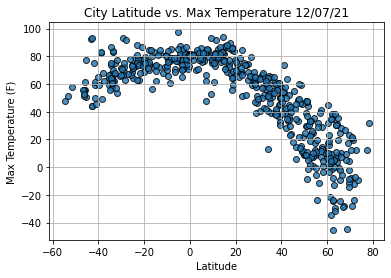

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

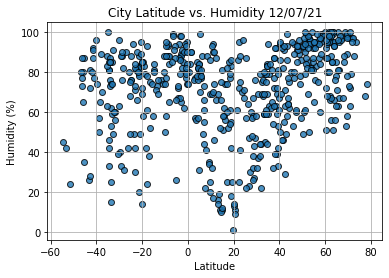

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

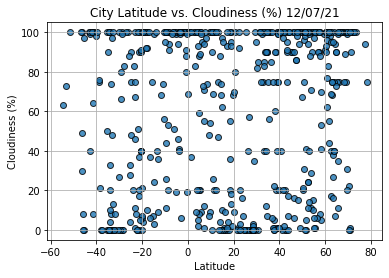

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

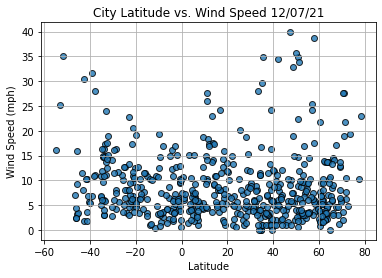

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()